In [1]:
import networkx as nx

### [Networkx online reference](https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf)

In [2]:
# 1.2 - Graphs
# basic classes: Graph, DiGraph, MultiGraph, MultiDiGraph

In [3]:
# 1.3 - Graph creation
g = nx.Graph(); g.add_edge(1,2); g.add_edge(2,3,weight=0.9)
g

In [4]:
# edge attributes
import math
g.add_edge('y','x',function=math.cos)
g.add_node(math.cos) # any hashable can be a node

In [5]:
# adding many edges at once
elist = [(1,2),(2,3),(1,4),(4,2)]
g.add_edges_from(elist)

elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
g.add_weighted_edges_from(elist)
g

[Tutorial](https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf#5e8)
[Operators](https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf#34b)
[Generators](https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf#43b)
[Importing](https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf#51d)
[Drawing](https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf#56e)

In [6]:
# 1.4 - Graph reporting

In [7]:
# 1.5 - Algorithms
# example: shortest weighted path (Dijkstra):
g = nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
g.add_weighted_edges_from(e)
print(nx.dijkstra_path(g, 'a', 'd'))

['a', 'c', 'd']


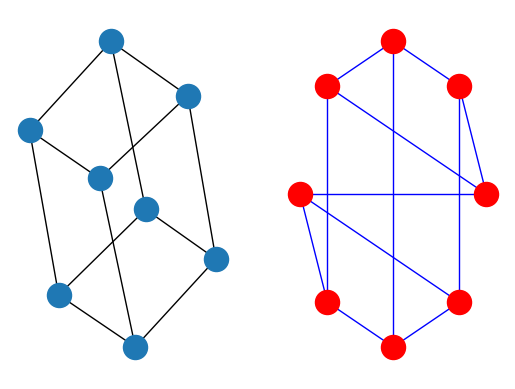

In [8]:
# 1.6 - Drawing
# basics: place nodes on a scatterplot. edges are lines between dots.

import matplotlib.pyplot as plt
g = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(g) # default spring_layout
subax2 = plt.subplot(122)
nx.draw(g, pos=nx.circular_layout(g), node_color='r', edge_color='b')

In [9]:
# 1.7 - Data Structure
# uses "dict of dicts" topology.
# below: undirected graph with edges (A,B) and (B,C)

g = nx.Graph(); g.add_edge('a','b'); g.add_edge('b','c')
print(g.adj)

{'a': {'b': {}}, 'b': {'a': {}, 'c': {}}, 'c': {'b': {}}}


In [10]:
g = nx.Graph(); g.add_edge(1,2,color='red',weight=0.84,size=300)
print(g[1][2]['size'])
print(g.edges[1,2]['color'])

300
red


## Graph Types

In [11]:
# 2.1 - Graph classes
# Class         Type         Self loops allowed?  Parallel edges allowed?
# -----------------------------------------------------------------------
# Graph         undirected   yes                  no
# DiGraph       directed     yes                  no
# MultiGraph    undirected   yes                  yes
# MultiDiGraph  directed     yes                  yes

In [12]:
# nodes:
g = nx.Graph()
g.add_node(1) # add a single node
g.add_nodes_from([(1,2),(2,3)]) # add nodes from any container
g.add_nodes_from(range(100,110))

h = nx.path_graph(10)
g.add_nodes_from(h)

In [13]:
# edges:
g.add_edge(1,2) # single edge
g.add_edges_from((1,2),(1,3)) # list of edges
g.add_edges_from(h.edges) # collection of edges

TypeError: Graph.add_edges_from() takes 2 positional arguments but 3 were given

In [14]:
# attributes:
g = nx.Graph(day="friday")
g.graph

{'day': 'friday'}

In [15]:
g.add_node(1,time="5pm")
g.add_nodes_from([3],time="2pm")
g.nodes[1]

{'time': '5pm'}

In [16]:
g.nodes[1]['room']=714 # node must already exist to use g.nodes
del g.nodes[1]['room'] # removes attribute
list(g.nodes(data=True))

[(1, {'time': '5pm'}), (3, {'time': '2pm'})]

In [17]:
# adding edge attributes (multiple methods)
g.add_edge(1,2,weight=4.7)
g.add_edges_from([(3,4),(4,5)],color='red')
g.add_edges_from([(1,2, {'color':'blue'}),
                  (2,3, {'weight':8    })
                 ])
g[1][2]['weight']=4.7
g.edges[1,2]['weight']=4.0
g.edges

EdgeView([(1, 2), (3, 4), (3, 2), (4, 5)])

In [18]:
# shortcuts
print(1 in g) # is node in the graph?
print([n for n in g if n<3]) # iterates through nodes
print(len(g)) # number of nodes in graph

True
[1, 2]
5


In [19]:
# shortcuts
# often the best way to traverse all graph edges is via the neighbors.
# neighbors are provided as an adjacency-dict.
for n, numbers_dict in g.adjacency():
    for number, each_attribute in numbers_dict.items():
        if 'weight' in each_attribute:
            print(each_attribute)

print()

# edges() is often more convenient:
for u,v,weight in g.edges.data('weight'):
    if weight is not None:
        print(u,v,weight)
        pass

{'weight': 4.0, 'color': 'blue'}
{'weight': 8}
{'weight': 4.0, 'color': 'blue'}
{'weight': 8}

1 2 4.0
3 2 8
